# **Simulador de Montecarlo**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import  warnings
warnings.filterwarnings('ignore')

## **Calcula el Area Bajo la Curva**

In [2]:
def f(x):
    return x**2
# Parámetros de la simulación
N = 10000  # Número de puntos aleatorios
x_min, x_max = 0, 1  # Límites en x
y_min, y_max = 0, 1  # Límites en y (f(x) está entre 0 y 1 en este intervalo)

# Generar puntos aleatorios
x_random = np.random.uniform(x_min, x_max, N)
y_random = np.random.uniform(y_min, y_max, N)

# Calcular cuántos puntos caen debajo de la curva f(x)
points_under_curve = y_random < f(x_random)
num_points_under_curve = np.sum(points_under_curve)

# Estimar el área bajo la curva
area_rect = (x_max - x_min) * (y_max - y_min)
area_under_curve = area_rect * (num_points_under_curve / N)

print(f"Área aproximada bajo la curva: {area_under_curve}")

Área aproximada bajo la curva: 0.3378


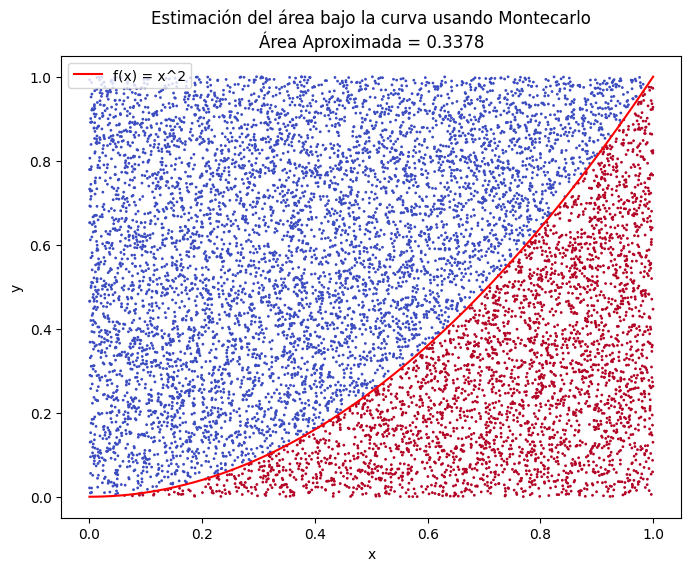

In [3]:
# Visualización
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(x_min, x_max, 100), f(np.linspace(x_min, x_max, 100)), 'r-', label='f(x) = x^2')
plt.scatter(x_random, y_random, c=points_under_curve, cmap='coolwarm', s=1)
plt.title(f"Estimación del área bajo la curva usando Montecarlo\nÁrea Aproximada = {area_under_curve:.4f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## **Simulación de Costos e Ingresos**

Ingresos:

Se estima que los ingresos son normalmente distribuidos con una media de $200,000 y una desviación estándar de $20,000.
Costos:

Los costos fijos son constantes a $50,000.
Los costos variables dependen del volumen de ventas y son normalmente distribuidos con una media de $120,000 y una desviación estándar de $15,000.
Simulación de Montecarlo:

Se realizarán 10,000 simulaciones para estimar el beneficio neto.

In [6]:
# Parámetros de la simulación
N = 10000  # Número de simulaciones
ingresos_media = 200000
ingresos_std = 20000
costos_fijos = 50000
costos_variables_media = 120000
costos_variables_std = 15000

# Generacion de datos simulados
ingresos_simulados=np.random.normal(ingresos_media,ingresos_std,N)
costos_variables_simulados=np.random.normal(costos_variables_media,costos_variables_std,    N)

# Cálculo de beneficios
beneficio_neto=ingresos_simulados - (costos_fijos+costos_variables_simulados)

# Resultado
beneficio_medio=np.mean(beneficio_neto)
probabilidad_perdida = np.mean(beneficio_neto < 0)

print(f"Beneficio neto medio: ${beneficio_medio:,.2f}")
print(f"Probabilidad de pérdida: {probabilidad_perdida:.2%}")



Beneficio neto medio: $29,782.95
Probabilidad de pérdida: 11.74%


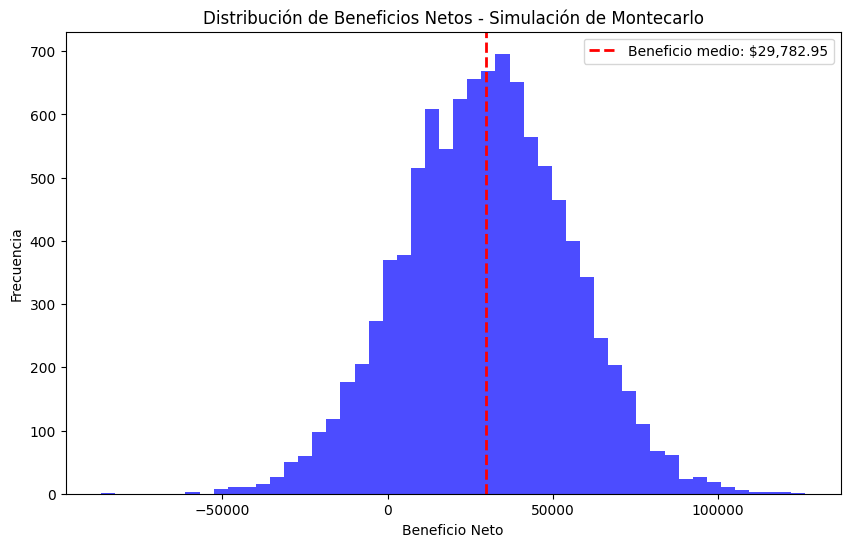

In [7]:
# Visualización
plt.figure(figsize=(10, 6))
plt.hist(beneficio_neto, bins=50, color='blue', alpha=0.7)
plt.axvline(beneficio_medio, color='red', linestyle='dashed', linewidth=2, label=f'Beneficio medio: ${beneficio_medio:,.2f}')
plt.title('Distribución de Beneficios Netos - Simulación de Montecarlo')
plt.xlabel('Beneficio Neto')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## **Evaluación de la Rentabilidad de un Proyecto con Montecarlo**
Supuestos del Modelo:
Horizonte de tiempo:

El proyecto tiene una duración de 5 años.
Ingresos:

Los ingresos anuales son normalmente distribuidos con una media de $500,000 y una desviación estándar de $50,000.
Costos:

Costos fijos: Son constantes en $100,000 por año.
Costos variables: Dependen del volumen de operaciones y son normalmente distribuidos con una media de $200,000 y una desviación estándar de $30,000 por año.

Inversión inicial:

El proyecto requiere una inversión inicial de $800,000.

Tasa de descuento:

La tasa de descuento anual es del 10%, pero esta tasa también tiene una pequeña incertidumbre, modelada con una distribución normal con una desviación estándar de 2%.
Número de simulaciones:

Realizaremos 10,000 simulaciones para estimar la rentabilidad del proyecto.
Indicador de rentabilidad:

Evaluaremos el Valor Presente Neto (VPN) del proyecto en cada simulación.

In [11]:
# Parámetros de la simulación
N = 10000  # Número de simulaciones
años = 5  # Duración del proyecto
ingresos_media = 500000
ingresos_std = 50000
costos_fijos = 100000
costos_variables_media = 200000
costos_variables_std = 30000
inversion_inicial = 800000
tasa_descuento_media = 0.10
tasa_descuento_std = 0.02

# Función para calcular el Valor Presente Neto (VPN)
def calcular_vpn(ingresos, costos_fijos, costos_variables, tasa_descuento, inversion_inicial):
    flujos_efectivo = ingresos - (costos_fijos + costos_variables)
    vpn = -inversion_inicial
    for año in range(años):
        vpn += flujos_efectivo[año] / (1 + tasa_descuento)**(año + 1)
    return vpn

vpns_simulados=[]
for i in range(N):
    ingresos_simulados=np.random.normal(ingresos_media,ingresos_std,años)
    costos_variables_simulados=np.random.normal(costos_variables_media,costos_variables_std,años)
    tasa_descuento_simulada=np.random.normal(tasa_descuento_media,tasa_descuento_std)
    vpn=calcular_vpn(ingresos_simulados,costos_fijos,costos_variables_simulados,tasa_descuento_simulada,inversion_inicial)
    vpns_simulados.append(vpn)
# Analisis de los resultados
# Análisis de resultados
vpns_simulados = np.array(vpns_simulados)
probabilidad_vpn_positivo = np.mean(vpns_simulados > 0)
vpn_medio = np.mean(vpns_simulados)

print(f"VPN medio: ${vpn_medio:,.2f}")
print(f"Probabilidad de VPN positivo: {probabilidad_vpn_positivo:.2%}")


VPN medio: $-41,208.72
Probabilidad de VPN positivo: 34.55%


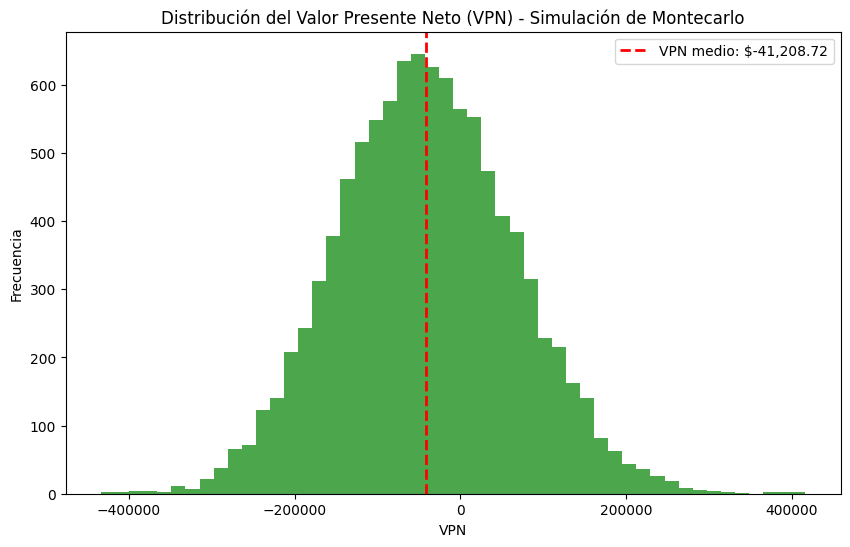

In [21]:
# Visualización
plt.figure(figsize=(10, 6))
plt.hist(vpns_simulados, bins=50, color='green', alpha=0.7)
plt.axvline(vpn_medio, color='red', linestyle='dashed', linewidth=2, label=f'VPN medio: ${vpn_medio:,.2f}')
plt.title('Distribución del Valor Presente Neto (VPN) - Simulación de Montecarlo')
plt.xlabel('VPN')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

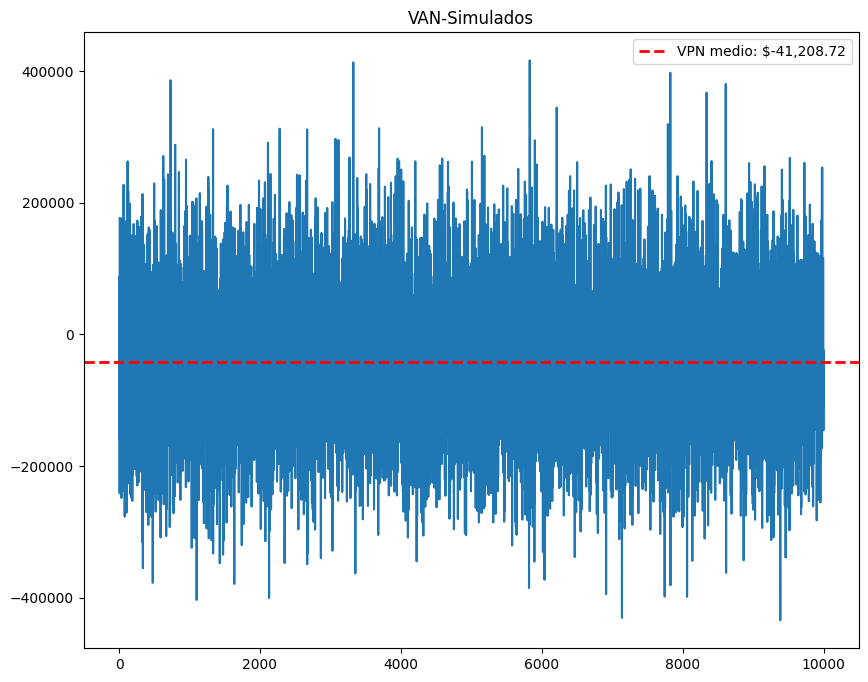

In [26]:
plt.figure(figsize=(10,8))
plt.plot(vpns_simulados)
plt.axhline(y=vpn_medio,color='red', linestyle='dashed', linewidth=2, label=f'VPN medio: ${vpn_medio:,.2f}')
plt.title('VAN-Simulados')
plt.legend()
plt.show()